# Estudo para a prova:
## Sumario:
### Pipeline ML
#### 1- Definir o problema
##### - Qual é a tarefa que queremos ensinar um computador a fazer?
#### 2- Coletar os dados
##### - Escolher uma base de dados do gagle basica para testes
##### - Dividir os dados de teste em 3 grupos: Treino, Validação e Teste
#### 3- Extração de Características (features)
##### - Avaliar as caracteriticas importantes da base estudada
##### - Não é uma tarefa fácil.
#### 4- Treinamento do modelo
##### - Usar o conjunto de testes para isso
#### 5- Testar o desempenho do modelo treinado
##### - Usar o conjunto de testes para isso
##### - medir a sua capacidade de generalização ao classificar outras imagens de cães e gatos não apresentados na etapa de treinamento

### Criando um Ambiente Virtual

In [2]:
!python -m venv --system-site-packages ./projeto_ml
!projeto_ml\Scripts\activate
!ipython kernel install --user --name=projeto_ml


Installed kernelspec projeto_ml in C:\Users\User\AppData\Roaming\jupyter\kernels\projeto_ml


# -> Aperete F5 e escolha o kernel "projeto_ml" <-

In [4]:
!pip install opencv-python
!pip install tensorflow 
#São cerca de 500 MB de dowload então pode demorar bastante.

!pip install tensorflow-datasets


# Aplicando Imports

In [5]:
# para tratar arquivos e diretorios
import os
import pathlib

#para tratar numeros e arrays
import numpy as np
import pandas as pd

#para o uso de machine Learning
import tensorflow as tf
import tensorflow_datasets as tfds


#para tratar imagens
import cv2

#para plotar graficos
import matplotlib.pyplot as plt
import PIL

# 1 Entendimento do negocio

## Defina o objetivo em termos de negócios
- Ao buscar na internet soluções em graficos é necessario que haja uma forma automatizada de encontrar graficos e defini-los
- Há também a possibilidade de gerar uma metrica de quantidade de graficos e suas relações, e por fim aplicar um verificador de graficos.

## Como a solução será usada?
- Como ferramenta de busca de graficos em determinado escopo ou como ferramenta de enssino.

## Quais as soluções/alternativas atuais (caso existam)?
- atualmente algumas ferramentas de busca já realizam a comparação entre imagens e muitas até usam isso, mas a proposta é apresentar uma ferramenta apropriada para esse tipo de reconhecimento: Definir o tipo de grafico.

## Como você deve abordar este problema (supervisionado/não supervisionado, etc)?
- Aprendizado supervisionado: busco encontrar predições a partir de imagens.
- Usarei tecnicas de deepLearning.

## Como o desempenho deve ser medido?
- Matrizes de confusão e metricas como percentual de acerto, etc.

## A medida de desempenho está alinhada com o objetivo do negócio?
- Sim, o algoritmo precisa de acurácia 

## Qual seria o desempenho mínimo para alcançar o objetivo
- acima de 90% de acerto seria um resultado.
- porém, busca-se valores acima de 95% 

## Tem especialista humano disponível?
- Eu mesmo posso definir e diferenciar determinados graficos.

## É possível reutilizar experiências ou ferramentas de outros contextos?
- o Google é uma caixa-preta, não posso usar o algoritmos deles aqui, porem já existem trabalhos neste sentido, mas ainda não consegui usá-los.

## Como você resolveria o problema manualmente
- Manualmente seria uma tarefa muito simples, ao visualizar um grafico eu definiria seu tipo, porem para fazer isso em muitas imagens isso poderia demanfdar muito tempo.

## Produza um plano do projeto selecionando as tecnologias e ferramentas e definindo planos detalhados para cada fase do projeto

### Planejamento
- Este projeto tem como finalidade desenvolver uma ferramenta de deeplearn capaz de diferenciar alguns tipos de graficos e propiciar uma predição apartir de dada uma imagem, ter como resposta um grafico.

#### Tecnologias
- para isso usarei algumas ferramentas:
    - Anaconda, para ser usada como ambiente de desenvoolvimento e facilitar o import de diversas libs.
    - A "IDE" Jupyter Lab / Jupyter Notebook para o sesemvolvimento estruturado e para a apresentação de resultados.
    - A linguagem de de sexemvolvimento Python 3.9
    - Dados encontrados na plataforma kaggle.
    
#### Ferramentas
- como ferrementas vou usar algumas libs:
    - TensorFlow, para aplicar o deeplearn
    - cv2, para tratamento de imagens
    - 
    
#### Detalhamento das fazes do projeto
1. encontrar imagens para serem usadas como dados da ferramenta.
2. tratar esses dados
    - possivelmente as imgens virão todas juntas em uma unica pastas, separá-las sera um pequeno desafio.
    - Definir quais imagems podem ser usadas e quais não podem.
    - Realizar um tratamento nas imagens para encontrar resultados validos.
3. Desenvolver o algoritmo para reconhecimento de imagens.
4. testar o algoritmo usando dados separados para esse fim.
5. Desenvolver uma ferramamenta mobile que realize o reconhecimento.

# 2. Compreensão dos dados
## Colete os dados de que você precisa e de quanto precisa.
- Os dados foram encontrados no seguinte endereço: [Kaggle](https://www.kaggle.com/datasets/sunedition/graphs-dataset)
- Para o meu projeto eu preferi baixar os dados.

## Verifique quanto de espaço esses dados ocuparão e obtenha autorização de uso, se necessário, assegurando que as informações confidencias sejam excluídas ou protegidas (ex. deixando-as anônimas)
- Os dados possuem o tamanho aproximado de 1.09GB, relativamente pequeno.
- não são daodos sensiveis e não necessitam de alteração.
- há apenas o pedido de citação dos dados.  [Kaggle](https://www.kaggle.com/datasets/sunedition/graphs-dataset)

## Descreva os dados: examine os dados e documente suas propriedades, como formato de dados, número de registros ou identidades de campo
- Os dados são separados em 8 classes:
    - 0 - **just image**: Apenas uma imagem sem qualquer grafico
    - 1 - **bar chart**: Grafico de barras
    - 2 - **diagram**: diagrmas
    - 3 - **flow chart**: graficos de fluxo
    - 4 - **graph**: apenas um grafico
    - 5 - **growth chart**: grafico de crescimento
    - 6 - **pie chart**: grafico de pizza
    - 7 - **table**: tabela

### Trata-se e um conjunto de imagens:
- A quantidade de imagens diversas:

In [8]:
diretorio_imagens = 'C:/Users/User/Documents/Projetos/Imagens/graphs'
#diretorio_imagens = '/home/filipedc/Documentos/Programação/python/projetoML/projetoML/graphs/'
diretorio = pathlib.Path(diretorio_imagens)
for i in list(diretorio.glob("*.*"))[:10]:
    print(i.stem)

bar_chart_0006-006-Stolbchataja-diagramma.jpg
bar_chart_008.jpg
bar_chart_013d0eca-b83e-414c-a36e-2643be4afdf5
bar_chart_016f9769-c0d4-4d4a-8826-50769edf4344
bar_chart_0183d9dc691b8c66d60814b4a1c88037.jpg
bar_chart_01f69819-ac2a-4680-a610-61e2b05a6408
bar_chart_0275.png
bar_chart_02e01f97-f11d-4c3c-9270-bbfd987f642a
bar_chart_030d1ee9-7434-4cb2-8b01-315489cb290e
bar_chart_043e0759-0346-44ce-9d6f-f844b9b10c49


## Verifique a qualidade dos dados: quão “limpos/sujos” estão os dados?
- Para facilitar o tratamento das imagens decidimos trocar os nomes das imagens para facilitar o trabalho. 

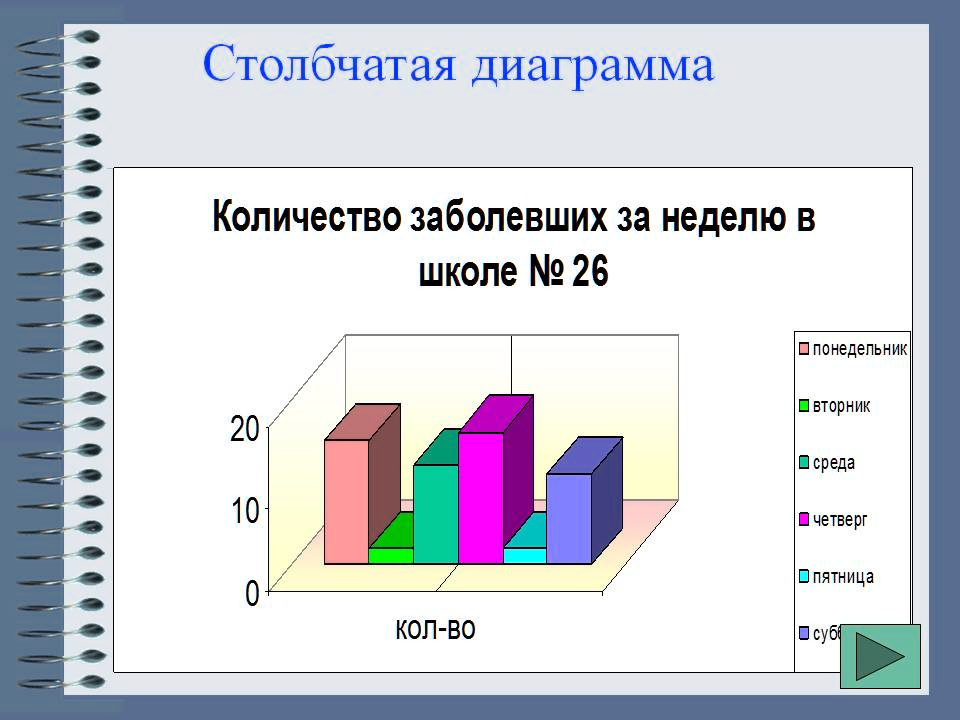

In [9]:
graficos = list(diretorio.glob('*'))
PIL.Image.open(str(graficos[10]))


#### Organizando os aquivos em pastas com as classes e renomeando os arquivos
##### O tensorFlow realiza a leitura automatica das classes quando organizados dessa maneira.

In [28]:
nome_classes = [
    "just_image", 
    "bar_chart", 
    "diagram", 
    "flow_chart", 
    "graph", 
    "growth_chart", 
    "pie_chart",
    "table"
]

for i in nome_classes:
    pathlib.Path(diretorio_imagens+'/'+i).mkdir(parents=True, exist_ok=True)

for classe in nome_classes:
    arquivos = diretorio.glob("*"+classe+"*.*")
    enderecos = list(arquivos)
    arquivos.close()
    for i,endereco in enumerate(enderecos):
        file = pathlib.Path(endereco)
        file.rename(diretorio_imagens+'/'+classe+'/'+str(i)+file.suffix)

print("pastas/classes")
for i in list(diretorio.glob("*"))[:10]:
    print(i.stem)

pastas/classes
FILIPE - 1


#### Definindo paramentos: 
    - bach_size -> o lote de treino
    - img_altura -> altura da imagem
    - img_largura -> largura da imagem

##### OBS: Para facilitar o a leitura de informação dos arquivos, vamos criar um dataframe usando pandas.

In [63]:

nome_classes = [
    "just_image", 
    "bar_chart", 
    "diagram", 
    "flow_chart", 
    "graph", 
    "growth_chart", 
    "pie_chart",
    "table"
]

dataset = []

for classe in nome_classes:
    print("classe: "+classe)
    for i in diretorio.glob("*"+classe+"*/*"):
        imagem = PIL.Image.open(i)
        dataset.append(
            [
                classe, #Nome da classse
                i.suffix, #tipo do arquivo
                i.absolute(), #Nome do arquivo
                (i.stat().st_size//1000), #Tamanho em Kb
                int(imagem.width), #largura da imagem
                int(imagem.height) #altura da imagem
            ]
        )
    

dataset_array = np.array(dataset)

ORIGINAL_DATA_SET = pd.DataFrame(
    data=dataset_array,
    columns=["classe", "tipo", "nome", "tamanho_Kb", "largura", "altura"]
)

df_dataset = ORIGINAL_DATA_SET.copy()

classe: just_image
classe: bar_chart
classe: diagram
classe: flow_chart
classe: graph
classe: growth_chart
classe: pie_chart
classe: table


#### Obs: um tratamento profundo foi necessario devido ao tipo ".gif", o qual não pode ser lido.

- Os dados que extraidos das imagens são:
    - A **classe** : o tipo de grafico
    - O **tipo**: o formato do arquivo
    - O **nomne**: o nome do arquivo
    - O **tamanho_Kb**: o tamanho do arquivo em kilobyte
    - A **largura**: a largura da imagem
    - A **altura**: a altura da imagem
   
## Explore os dados: Estude cada atributo e suas propriedades (nome, tipo, % de valores ausentes, quais atributos alvos, etc).

- Estudaremos alguns dados dos atributos extraidos

In [37]:
qtd_imagens = len(df_dataset)
print("Neste projeto serão usadas %d imagens" %qtd_imagens)

Neste projeto serão usadas 15875 imagens


- Organizados da seguinte maneira:

In [38]:
df_dataset = df_dataset.astype({"classe": "str", "tipo": "str", "nome": "str", "tamanho_Kb": "int32", "largura": "int32", "altura": "int32"})
df_dataset[-5:]

,classe,tipo,nome,tamanho_Kb,largura,altura
15870,table,.jpg,C:\Users\User\Documents\Projetos\Imagens\graph...,15,370,136
15871,table,.jpg,C:\Users\User\Documents\Projetos\Imagens\graph...,28,225,225
15872,table,.jpg,C:\Users\User\Documents\Projetos\Imagens\graph...,29,285,177
15873,table,.jpg,C:\Users\User\Documents\Projetos\Imagens\graph...,21,327,154
15874,table,.jpg,C:\Users\User\Documents\Projetos\Imagens\graph...,10,157,320


- Definindo os tipos

In [39]:
df_dataset.dtypes

classe        object
tipo          object
nome          object
tamanho_Kb     int32
largura        int32
altura         int32
dtype: object

## Documente quaisquer problema de qualidade:

#### O formato não unico dos arquivos, entre elas webp, gifs e pngs...

In [40]:
df_dataset_tipo = df_dataset.groupby(["tipo"])['tipo']\
    .count()

df_dataset_tipo

tipo
.JPG        10
.gif         3
.jpeg        2
.jpg     15763
.png        96
.webp        1
Name: tipo, dtype: int64

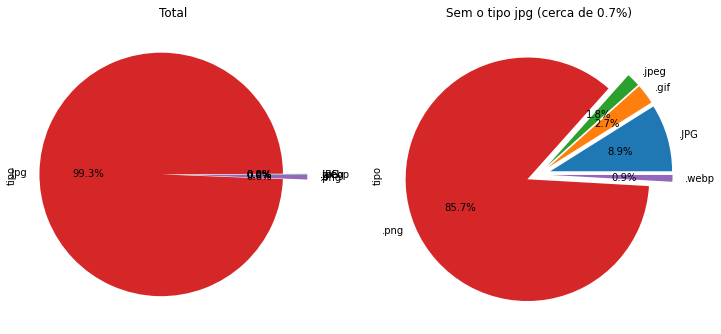

In [41]:
fig, axes = plt.subplots(nrows=1, ncols=2)

df_dataset_tipo\
    .plot\
    .pie(
        ax = axes[0],
        figsize=(12, 12),
        autopct='%1.1f%%',
        explode=[0.1 for _ in range(len(df_dataset_tipo))]   
    )
axes[0].set_title("Total")

df_dataset_tipo\
    .drop('.jpg')\
    .plot\
    .pie(
        ax = axes[1],
        figsize=(12, 12),
        autopct='%1.1f%%',
        explode=[0.1 for _ in range(len(df_dataset_tipo)-1)]
    )
axes[1].set_title("Sem o tipo jpg (cerca de 0.7%)")
plt.show()

## Visualize os dados e estude a correlação entre os atributos
- Quanto a classe:

In [12]:
df_dataset_classe = df_dataset.groupby(["classe"])['classe'].count()
df_dataset_classe

classe
bar_chart       1982
diagram         2047
flow_chart      1703
graph           1976
growth_chart    1098
just_image      3174
pie_chart       1831
table           2064
Name: classe, dtype: int64

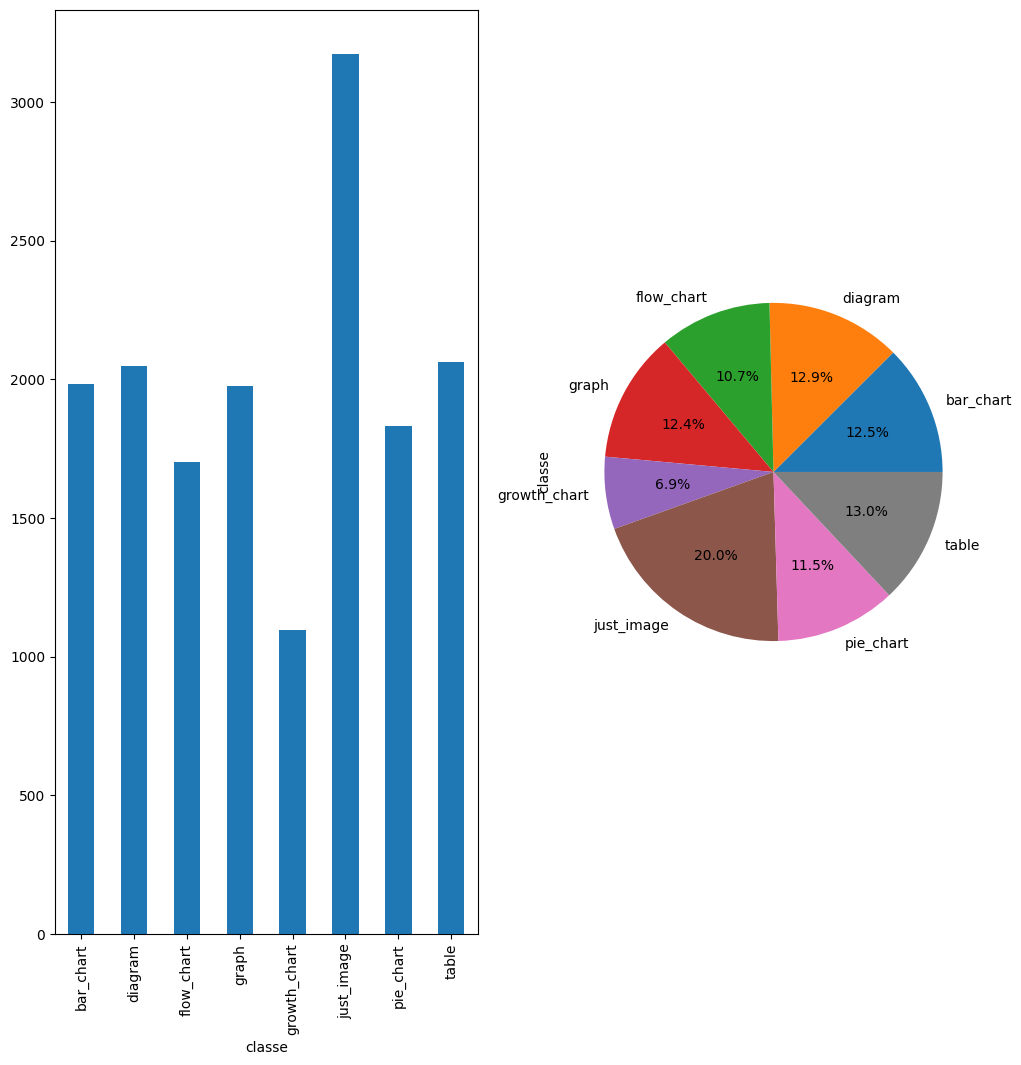

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=2)

df_dataset_classe.plot.bar(ax=axes[0], figsize=(10, 10))#, autopct='%1.1f%%')
df_dataset_classe.plot.pie(ax=axes[1], figsize=(12, 12), autopct='%1.1f%%')

plt.show()

    - mosta uma certa similaridade entre as quantidades de cada tipo de classse

In [14]:
df_dataset_classe_largura_altura = df_dataset.groupby(["classe"])[["classe",'largura','altura']]

In [15]:
df_dataset_classe_largura_altura.min(numeric_only=True)

,largura,altura
classe,,
bar_chart,100,100
diagram,100,100
flow_chart,29,87
graph,100,90
growth_chart,100,100
just_image,48,48
pie_chart,100,100
table,63,78


In [16]:
df_dataset_classe_largura_altura.median(numeric_only=True)

,largura,altura
classe,,
bar_chart,286.0,194.0
diagram,278.0,197.0
flow_chart,259.0,227.0
graph,269.0,203.0
growth_chart,259.0,225.0
just_image,283.0,225.0
pie_chart,275.0,194.0
table,300.0,228.0


In [17]:
df_dataset_classe_largura_altura.max(numeric_only=True)

,largura,altura
classe,,
bar_chart,3638,3307
diagram,3750,3750
flow_chart,3495,4726
graph,5000,3750
growth_chart,5576,4000
just_image,6070,4912
pie_chart,5120,5120
table,7682,5775


In [11]:
batch_size = 32
img_altura = 180
img_largura = 180

### 3. Preparação dos dados
### - Uma regra comum é que 80% do projeto é a preparação de dados
#### ❑ Selecionar dados: Determine quais os conjuntos de dados serão usados e documente os motivos da inclusão/exclusão
    - Para esse projeto a quantidade de dados deva ser almentada em alguns pontos...
    - Uma redução pontual do numero de classes chamadas de "just_image" não é necessária, mesmo possuindo uma quantidade desbalanceada quando comparada com o restante do dataset, esse valor não se mostra expressivo a ponto desta redução.

In [32]:
ds_treino = tf.keras.utils.image_dataset_from_directory(
  diretorio,
  validation_split=0.2,
  subset="training",
  seed=123, #seed estática
  image_size=(img_altura, img_largura),
  batch_size=batch_size)


Found 15874 files belonging to 8 classes.
Using 12700 files for training.


In [56]:
ds_validacao = tf.keras.utils.image_dataset_from_directory(
  diretorio,
  validation_split=0.2,
  subset="validation",
  seed=123, #seed estática
  image_size=(img_altura, img_largura),
  batch_size=batch_size)


Found 15874 files belonging to 8 classes.
Using 3174 files for validation.


#### ❑ Limpeza de dados
##### ❑ Corrigir oou remover outiliers (opcional)
    -Diante da analize dos dados não foram encontrados valores discrepantes entre si, haja vista a redução da escala de cada imagens para um tamanho expecifico o que reduziu a diferença na maioria das caracteriticas.


In [107]:
classes = ds_treino.class_names
print(classes)
qtd_classes = len(classes)

['bar_chart', 'diagram', 'flow_chart', 'graph', 'growth_chart', 'just_image', 'pie_chart', 'table']


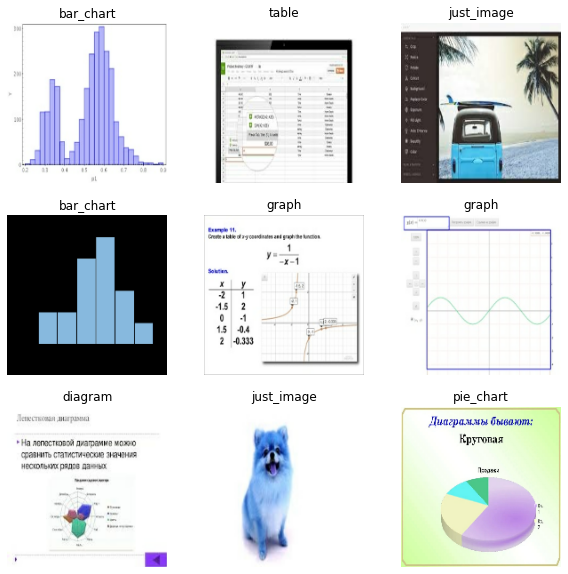

In [43]:
plt.figure(figsize=(10, 10))
for images, labels in ds_treino.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(classes[labels[i]])
        plt.axis("off")


In [46]:
for imagem, labels in ds_treino:
    print("lote de: ", imagem.shape[0]," para imagens com tamanho: ", imagem.shape[1],'X', imagem.shape[2],'X', imagem.shape[3] )
    break


lote de:  32  para imagens com tamanho:  180 X 180 X 3


In [53]:
normalizacao_camadaRGB = tf.keras.layers.Rescaling(1./255)



In [57]:
AUTOTUNE = tf.data.AUTOTUNE

ds_treino_cache = ds_treino.cache().prefetch(buffer_size=AUTOTUNE)
ds_validacao_cache = ds_validacao.cache().prefetch(buffer_size=AUTOTUNE)


In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


##### ❑ Preencher valores ausentes (missing values) ou eliminar suas instâncias (ou colunas)
    - Não é necessario, devido ao fato de se tratar de uma base de dados de imagens.
#### ❑ Seleção de características (opcional): eliminar (“dropa”) os atributos que não fornecem informações úteis para a tarefa
    - não hã caracteriticas que devam ser eliminadas.
#### ❑ Engenharia de Atributos ou de características (Feature Engineering): reformatar os dados conforme necessário. Por exemplo, discretizar características contínuas, realizar transformações (ex.: log(x), sqrt(x), etc.), compor novas características a partir das existentes, padronizar ou normalizar as características, etc
    - Não ha essa necessidade.

### 4. Modelagem
#### 1. Treine muitos modelos rápidos e simples de diferentes categorias (ex.: linear, Naive Bayes, SVM, random florest, rede neural, etc) usando parâmetros-padrão
    - Para testes iniciais usaremos poucas camadas e avaliação da acuracia.
    
#### 2. Medir e comparar o desempenho (ex: média e desvio-padrão do erro). Para cada modelo é interessante usar a validação cruzada k-fold
#### 3. Analise as variáveis mais significativas para cada algoritmo
#### 4. Analise os erros que os modelos cometem
#### 5. Execute uma rodada rápida de seleção de características e feature engineering
#### 6. Rode mais uma ou duas iterações rápidas das 5 etapas anteriores
#### 7. Faça uma pré-seleção de 3 à 5 modelos com melhor desempenho


In [116]:
modelo_3_c = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 32, activation='relu'),
  tf.keras.layers.Conv2D(32, 32, activation='relu'),
  tf.keras.layers.Conv2D(32, 32, activation='relu'),
  tf.keras.layers.Dense(qtd_classes)
])

modelo_3_c.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

modelo_3_c.fit(
  ds_treino_cache,
  validation_data=ds_validacao_cache,
  epochs=3
)

Epoch 1/3


InvalidArgumentError: Graph execution error:

Detected at node 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits' defined at (most recent call last):
    File "C:\Users\User\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\User\anaconda3\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "C:\Users\User\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "C:\Users\User\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 677, in start
      self.io_loop.start()
    File "C:\Users\User\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\User\anaconda3\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "C:\Users\User\anaconda3\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "C:\Users\User\anaconda3\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\User\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 471, in dispatch_queue
      await self.process_one()
    File "C:\Users\User\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 460, in process_one
      await dispatch(*args)
    File "C:\Users\User\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 367, in dispatch_shell
      await result
    File "C:\Users\User\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 662, in execute_request
      reply_content = await reply_content
    File "C:\Users\User\anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 360, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "C:\Users\User\anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 532, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\User\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2863, in run_cell
      result = self._run_cell(
    File "C:\Users\User\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2909, in _run_cell
      return runner(coro)
    File "C:\Users\User\anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\User\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3106, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\User\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3309, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\User\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3369, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\User\AppData\Local\Temp\ipykernel_9268\4009956806.py", line 14, in <cell line: 14>
      modelo_3_c.fit(
    File "C:\Users\User\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\User\anaconda3\lib\site-packages\keras\engine\training.py", line 1564, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\User\anaconda3\lib\site-packages\keras\engine\training.py", line 1160, in train_function
      return step_function(self, iterator)
    File "C:\Users\User\anaconda3\lib\site-packages\keras\engine\training.py", line 1146, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\User\anaconda3\lib\site-packages\keras\engine\training.py", line 1135, in run_step
      outputs = model.train_step(data)
    File "C:\Users\User\anaconda3\lib\site-packages\keras\engine\training.py", line 994, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\User\anaconda3\lib\site-packages\keras\engine\training.py", line 1052, in compute_loss
      return self.compiled_loss(
    File "C:\Users\User\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\User\anaconda3\lib\site-packages\keras\losses.py", line 152, in __call__
      losses = call_fn(y_true, y_pred)
    File "C:\Users\User\anaconda3\lib\site-packages\keras\losses.py", line 272, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\User\anaconda3\lib\site-packages\keras\losses.py", line 2084, in sparse_categorical_crossentropy
      return backend.sparse_categorical_crossentropy(
    File "C:\Users\User\anaconda3\lib\site-packages\keras\backend.py", line 5630, in sparse_categorical_crossentropy
      res = tf.nn.sparse_softmax_cross_entropy_with_logits(
Node: 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits'
logits and labels must have the same first dimension, got logits shape [242208,8] and labels shape [32]
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_21366]

In [113]:
modelo_2_c = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.Dense(qtd_classes)
])

modelo_2_c.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

modelo_2_c.fit(
  ds_treino_cache,
  validation_data=ds_validacao_cache,
  epochs=3
)

Epoch 1/3


InvalidArgumentError: Graph execution error:

Detected at node 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits' defined at (most recent call last):
    File "C:\Users\User\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\User\anaconda3\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "C:\Users\User\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "C:\Users\User\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 677, in start
      self.io_loop.start()
    File "C:\Users\User\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\User\anaconda3\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "C:\Users\User\anaconda3\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "C:\Users\User\anaconda3\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\User\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 471, in dispatch_queue
      await self.process_one()
    File "C:\Users\User\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 460, in process_one
      await dispatch(*args)
    File "C:\Users\User\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 367, in dispatch_shell
      await result
    File "C:\Users\User\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 662, in execute_request
      reply_content = await reply_content
    File "C:\Users\User\anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 360, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "C:\Users\User\anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 532, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\User\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2863, in run_cell
      result = self._run_cell(
    File "C:\Users\User\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2909, in _run_cell
      return runner(coro)
    File "C:\Users\User\anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\User\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3106, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\User\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3309, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\User\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3369, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\User\AppData\Local\Temp\ipykernel_9268\2846578934.py", line 13, in <cell line: 13>
      modelo_2_c.fit(
    File "C:\Users\User\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\User\anaconda3\lib\site-packages\keras\engine\training.py", line 1564, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\User\anaconda3\lib\site-packages\keras\engine\training.py", line 1160, in train_function
      return step_function(self, iterator)
    File "C:\Users\User\anaconda3\lib\site-packages\keras\engine\training.py", line 1146, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\User\anaconda3\lib\site-packages\keras\engine\training.py", line 1135, in run_step
      outputs = model.train_step(data)
    File "C:\Users\User\anaconda3\lib\site-packages\keras\engine\training.py", line 994, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\User\anaconda3\lib\site-packages\keras\engine\training.py", line 1052, in compute_loss
      return self.compiled_loss(
    File "C:\Users\User\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\User\anaconda3\lib\site-packages\keras\losses.py", line 152, in __call__
      losses = call_fn(y_true, y_pred)
    File "C:\Users\User\anaconda3\lib\site-packages\keras\losses.py", line 272, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\User\anaconda3\lib\site-packages\keras\losses.py", line 2084, in sparse_categorical_crossentropy
      return backend.sparse_categorical_crossentropy(
    File "C:\Users\User\anaconda3\lib\site-packages\keras\backend.py", line 5630, in sparse_categorical_crossentropy
      res = tf.nn.sparse_softmax_cross_entropy_with_logits(
Node: 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits'
logits and labels must have the same first dimension, got logits shape [991232,8] and labels shape [32]
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_12679]

In [114]:
modelo_3_c_maxPool = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.Dense(qtd_classes)
])

modelo_3_c_maxPool.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

modelo_3_c_maxPool.fit(
  ds_treino_cache,
  validation_data=ds_validacao_cache,
  epochs=3
)

Epoch 1/3


InvalidArgumentError: Graph execution error:

Detected at node 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits' defined at (most recent call last):
    File "C:\Users\User\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\User\anaconda3\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "C:\Users\User\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "C:\Users\User\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 677, in start
      self.io_loop.start()
    File "C:\Users\User\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\User\anaconda3\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "C:\Users\User\anaconda3\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "C:\Users\User\anaconda3\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\User\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 471, in dispatch_queue
      await self.process_one()
    File "C:\Users\User\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 460, in process_one
      await dispatch(*args)
    File "C:\Users\User\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 367, in dispatch_shell
      await result
    File "C:\Users\User\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 662, in execute_request
      reply_content = await reply_content
    File "C:\Users\User\anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 360, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "C:\Users\User\anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 532, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\User\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2863, in run_cell
      result = self._run_cell(
    File "C:\Users\User\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2909, in _run_cell
      return runner(coro)
    File "C:\Users\User\anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\User\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3106, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\User\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3309, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\User\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3369, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\User\AppData\Local\Temp\ipykernel_9268\322812184.py", line 16, in <cell line: 16>
      modelo_3_c_maxPool.fit(
    File "C:\Users\User\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\User\anaconda3\lib\site-packages\keras\engine\training.py", line 1564, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\User\anaconda3\lib\site-packages\keras\engine\training.py", line 1160, in train_function
      return step_function(self, iterator)
    File "C:\Users\User\anaconda3\lib\site-packages\keras\engine\training.py", line 1146, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\User\anaconda3\lib\site-packages\keras\engine\training.py", line 1135, in run_step
      outputs = model.train_step(data)
    File "C:\Users\User\anaconda3\lib\site-packages\keras\engine\training.py", line 994, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\User\anaconda3\lib\site-packages\keras\engine\training.py", line 1052, in compute_loss
      return self.compiled_loss(
    File "C:\Users\User\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\User\anaconda3\lib\site-packages\keras\losses.py", line 152, in __call__
      losses = call_fn(y_true, y_pred)
    File "C:\Users\User\anaconda3\lib\site-packages\keras\losses.py", line 272, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\User\anaconda3\lib\site-packages\keras\losses.py", line 2084, in sparse_categorical_crossentropy
      return backend.sparse_categorical_crossentropy(
    File "C:\Users\User\anaconda3\lib\site-packages\keras\backend.py", line 5630, in sparse_categorical_crossentropy
      res = tf.nn.sparse_softmax_cross_entropy_with_logits(
Node: 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits'
logits and labels must have the same first dimension, got logits shape [53792,8] and labels shape [32]
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_13516]

In [115]:
modelo_3_c_maxPool_noRescaling = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(qtd_classes)
])

modelo_3_c_maxPool_noRescaling.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

modelo_3_c_maxPool_noRescaling.fit(
  ds_treino_cache,
  validation_data=ds_validacao_cache,
  epochs=3
)

Epoch 1/3
397/397 [==============================] - 337s 848ms/step - loss: 7.4020 - accuracy: 0.4224 - val_loss: 1.3749 - val_accuracy: 0.5347
Epoch 2/3
397/397 [==============================] - 387s 974ms/step - loss: 1.1571 - accuracy: 0.6002 - val_loss: 1.2259 - val_accuracy: 0.5996
Epoch 3/3
397/397 [==============================] - 363s 914ms/step - loss: 0.9091 - accuracy: 0.6865 - val_loss: 1.2332 - val_accuracy: 0.5951


In [ ]:
modelo = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(qtd_classes)
])

In [60]:
modelo.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])


In [62]:
modelo.fit(
  ds_treino_cache,
  validation_data=ds_validacao_cache,
  epochs=3
)


Epoch 1/3
397/397 [==============================] - 275s 687ms/step - loss: 1.3749 - accuracy: 0.5057 - val_loss: 1.1481 - val_accuracy: 0.6033
Epoch 2/3
397/397 [==============================] - 341s 858ms/step - loss: 0.9551 - accuracy: 0.6683 - val_loss: 1.0047 - val_accuracy: 0.6541
Epoch 3/3
397/397 [==============================] - 391s 986ms/step - loss: 0.6955 - accuracy: 0.7616 - val_loss: 0.8262 - val_accuracy: 0.7303


In [ ]:
https://www.tensorflow.org/tutorials/load_data/images?hl=pt-br
https://www.tensorflow.org/tutorials/load_data/pandas_dataframe?hl=pt-br

In [105]:
predictions = modelo.predict(ds_validacao_cache)

y = np.concatenate([y for x, y in ds_validacao_cache], axis=0)

#print([(label) for image, label in ds_validacao_cache])
for i, prediction in enumerate(predictions[:30]):
    print('Imagem predito: {} - {}'.format(np.argmax(prediction), classes[np.argmax(prediction)]))
    print('Imagem real: {} - {}'.format(y[i], classes[y[i]]))
    print('-----------------------------')


Imagem predito: 6 - pie_chart
Imagem real: 6 - pie_chart
-----------------------------
Imagem predito: 3 - graph
Imagem real: 3 - graph
-----------------------------
Imagem predito: 5 - just_image
Imagem real: 5 - just_image
-----------------------------
Imagem predito: 0 - bar_chart
Imagem real: 0 - bar_chart
-----------------------------
Imagem predito: 7 - table
Imagem real: 7 - table
-----------------------------
Imagem predito: 3 - graph
Imagem real: 3 - graph
-----------------------------
Imagem predito: 7 - table
Imagem real: 7 - table
-----------------------------
Imagem predito: 5 - just_image
Imagem real: 5 - just_image
-----------------------------
Imagem predito: 4 - growth_chart
Imagem real: 3 - graph
-----------------------------
Imagem predito: 2 - flow_chart
Imagem real: 2 - flow_chart
-----------------------------
Imagem predito: 3 - graph
Imagem real: 3 - graph
-----------------------------
Imagem predito: 4 - growth_chart
Imagem real: 4 - growth_chart
---------------

### 5. Avaliação
#### ❑ Avalie os resultados: Os modelos atendem aos critérios de sucesso do negócio? Qual(is) devemos aprovar para o negócio?
#### ❑ Processo de revisão: Revise o trabalho realizado. Alguma coisa foi esquecida? Todas as etapas foram executadas corretamente? Resuma as descobertas e corrija qualquer coisa, se necessário
#### ❑ Apresente sua solução. Documentar o que foi feito, explicar porque sua solução alcança o objetivo do negócio, etc
#### ❑ Determine as próximas etapas: Com base nas três tarefas anteriores, determine se deve continuar com a implantação, iterar mais ou iniciar novos projetos Importante: não ajuste seu modelo depois de medir o erro de generalização: você simplesmente começaria a ajustar o conjunto de teste

### 6. Implantação
#### ❑ Planejar a implantação: Desenvolva e documente um plano para implantar o modelo.
#### ❑ Plano de monitoramento e manutenção: Desenvolva um plano completo de monitoramento e manutenção para evitar problemas durante a fase operacional (ou fase pós-projeto) de um modelo.
#### ❑ Produzir relatório final: A equipe do projeto documenta um resumo do projeto que pode incluir uma apresentação final dos resultados da mineração de dados.
#### ❑ Revisão do projeto: Conduza uma retrospectiva do projeto sobre o que deu certo, o que poderia ter sido melhor e como melhorar no futuro